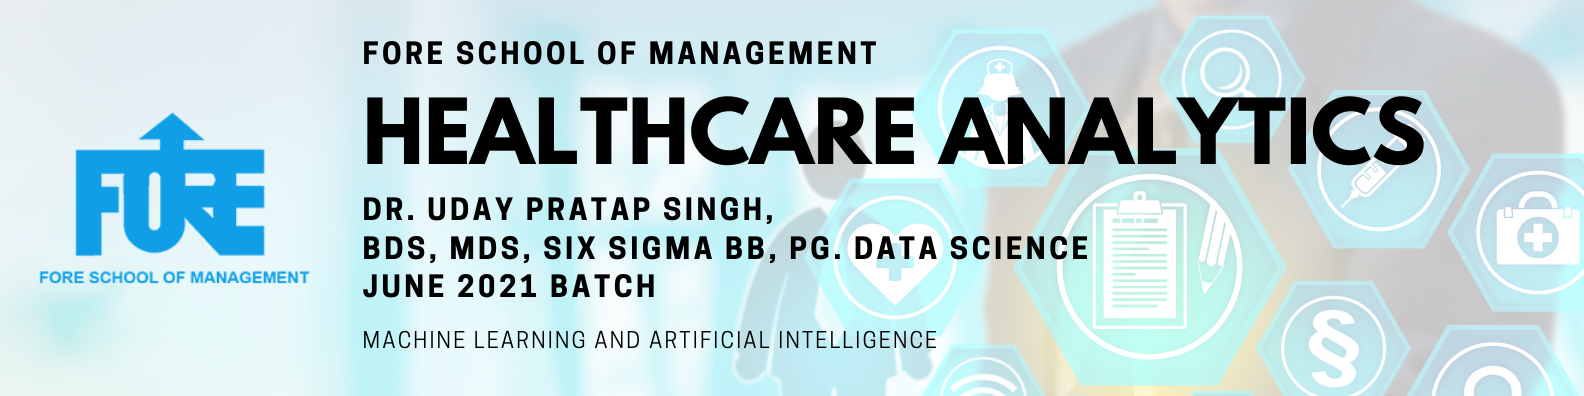

In [ ]:
# Last amended: 5th July, 2021
# Data Source: Kaggle: https://www.kaggle.com/sajidsaifi/prostate-cancer
# My folder: D:\data\OneDrive\Documents\healthcare_analytics_program\students

## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [3]:
d = pd.read_csv('Prostate_Cancer.csv')

In [4]:
d.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
d.shape

(100, 10)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [7]:
d.describe(include = 'all')

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,NaN,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,NaN,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,NaN,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,NaN,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,NaN,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000


In [8]:
cat=[]
num=[]
for i in d.columns:
    if d[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['diagnosis_result']
['id', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']


In [9]:
d[cat].describe().T

,count,unique,top,freq
diagnosis_result,100,2,M,62


In [10]:
d[num].describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [11]:
d1 = d.copy()

## Understanding the dataset

In [12]:
for i in d1:
    print('Feature Name:', i)
    print(d1[i].value_counts())
    print('Number of Missing values in', i, '=', d[i].isna().sum())
    print('--------------------*---------------------')
    

Feature Name: id
100    1
37     1
27     1
28     1
29     1
      ..
70     1
71     1
72     1
73     1
1      1
Name: id, Length: 100, dtype: int64
Number of Missing values in id = 0
--------------------*---------------------
Feature Name: diagnosis_result
M    62
B    38
Name: diagnosis_result, dtype: int64
Number of Missing values in diagnosis_result = 0
--------------------*---------------------
Feature Name: radius
10    11
19     9
16     8
11     8
22     7
25     6
21     6
20     6
18     6
17     6
23     5
15     5
14     5
12     5
9      4
24     3
Name: radius, dtype: int64
Number of Missing values in radius = 0
--------------------*---------------------
Feature Name: texture
15    9
21    9
11    8
13    8
14    8
26    7
12    7
18    7
27    7
16    6
24    5
17    4
22    4
25    4
19    4
23    2
20    1
Name: texture, dtype: int64
Number of Missing values in texture = 0
--------------------*---------------------
Feature Name: perimeter
83     5
87     5
86     4


In [13]:
d1.drop('id', axis = 1, inplace = True)

In [14]:
d1['diagnosis_result'] = d1['diagnosis_result'].apply(lambda x : 1 if x == 'M' else 2)

## Segregating Numerical features from categorical

In [15]:
cat_d1=[]
num_d1=[]
for i in d1.columns:
    if d1[i].dtype=="object":
        cat_d1.append(i)
    else:
        num_d1.append(i)
print(cat_d1) 
print(num_d1)

[]
['diagnosis_result', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']


## Reviewing any missing data

In [16]:
d1.isna().sum().sort_values(ascending = False)

fractal_dimension    0
symmetry             0
compactness          0
smoothness           0
area                 0
perimeter            0
texture              0
radius               0
diagnosis_result     0
dtype: int64

## Reviewing any duplicated data points

In [17]:
d.duplicated().sum()

0

## Analysing the outliers

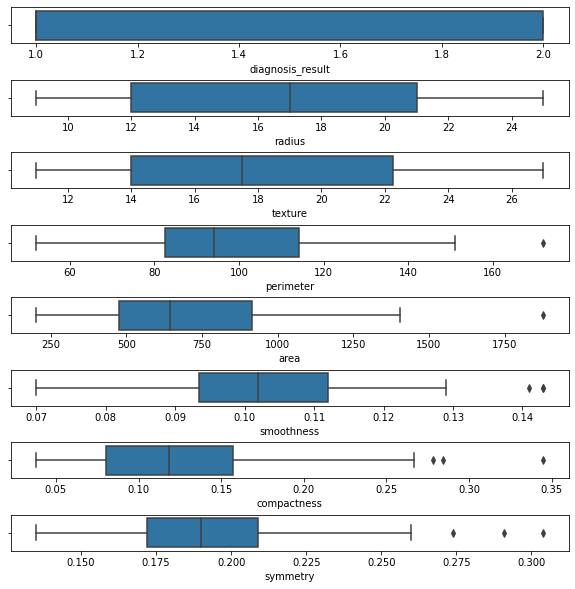

In [18]:
fig,axes = plt.subplots(8,1,figsize=(10,10))
plt.subplots_adjust(hspace=1)
for i,ax in zip(num_d1,axes.flatten()):
    sns.boxplot(d1[i],ax=ax)

## Univariate analysis

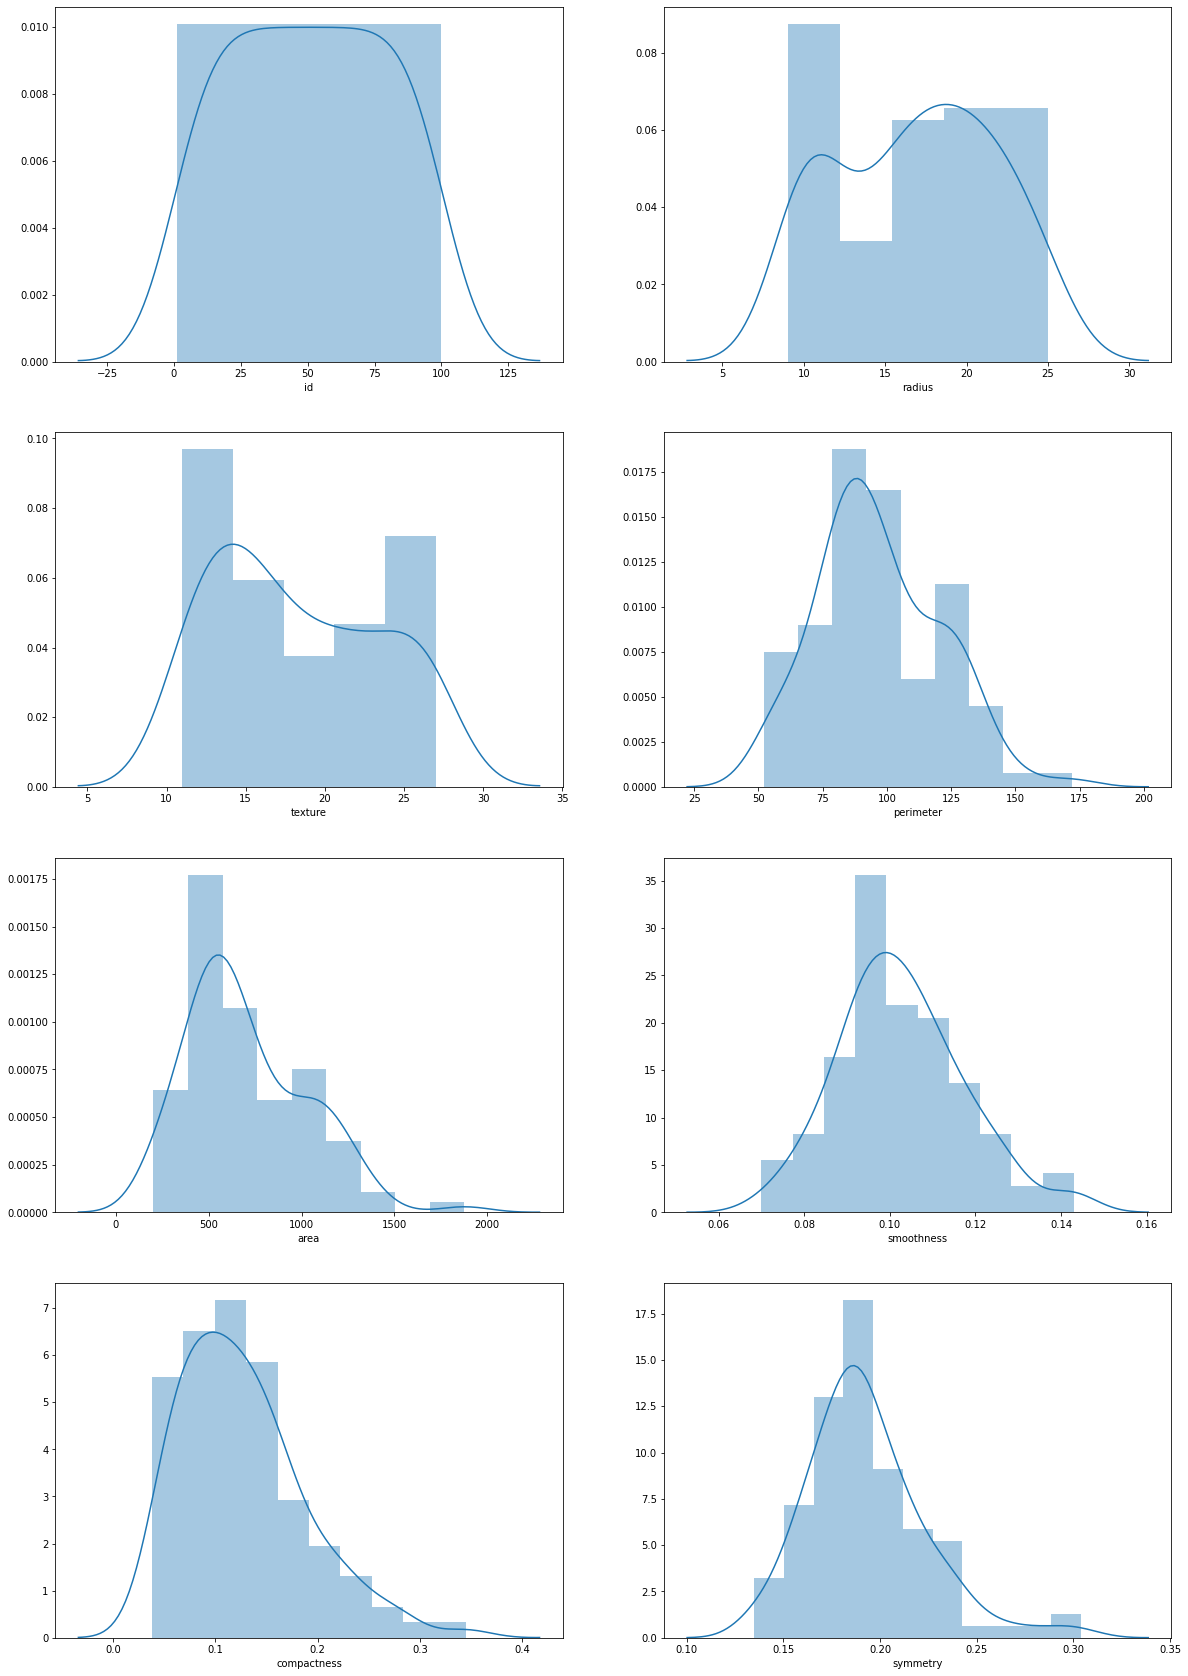

In [19]:
fig,axes = plt.subplots(4,2,figsize=(20,30))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
for i,ax in zip(num,axes.flatten()):
    sns.distplot(d[num][i], ax=ax)
#     ax.set_xticklabels(list(d[cat][i].unique()),rotation=90)

## Bivariate analysis

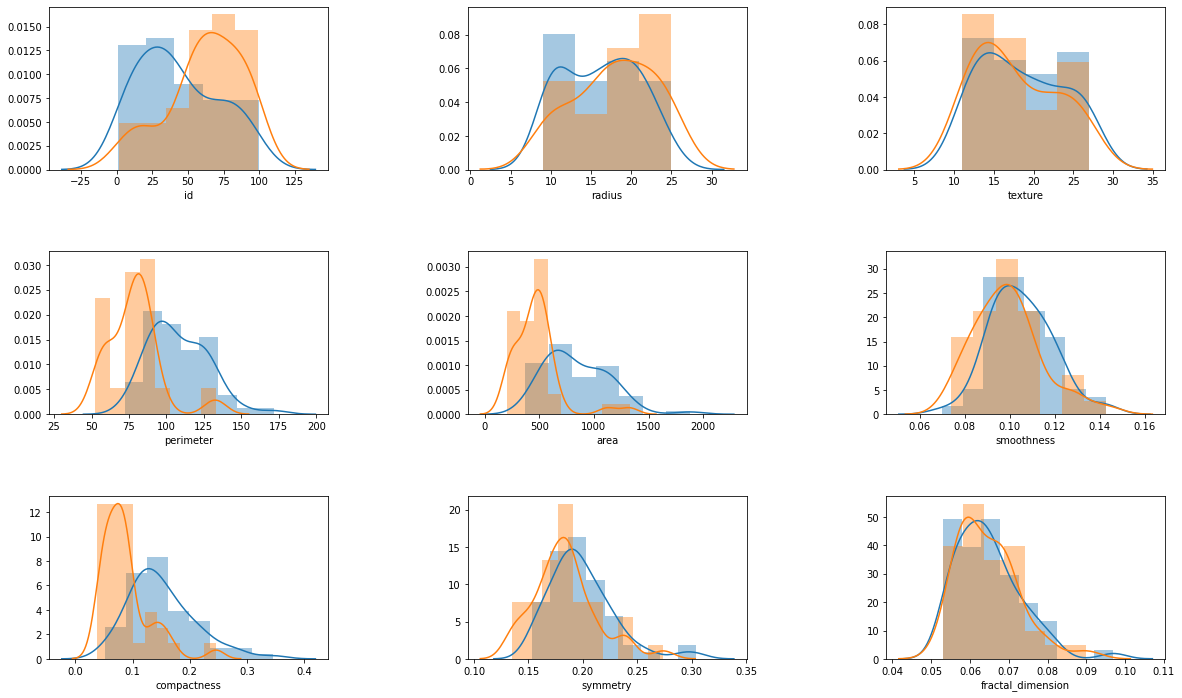

In [20]:
fig,axes = plt.subplots(3,3,figsize=(20,12))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i,ax in zip(num,axes.flatten()):
    sns.distplot(d[d['diagnosis_result'] == 'M'][i],ax=ax)
    sns.distplot(d[d['diagnosis_result'] == 'B'][i],ax=ax)

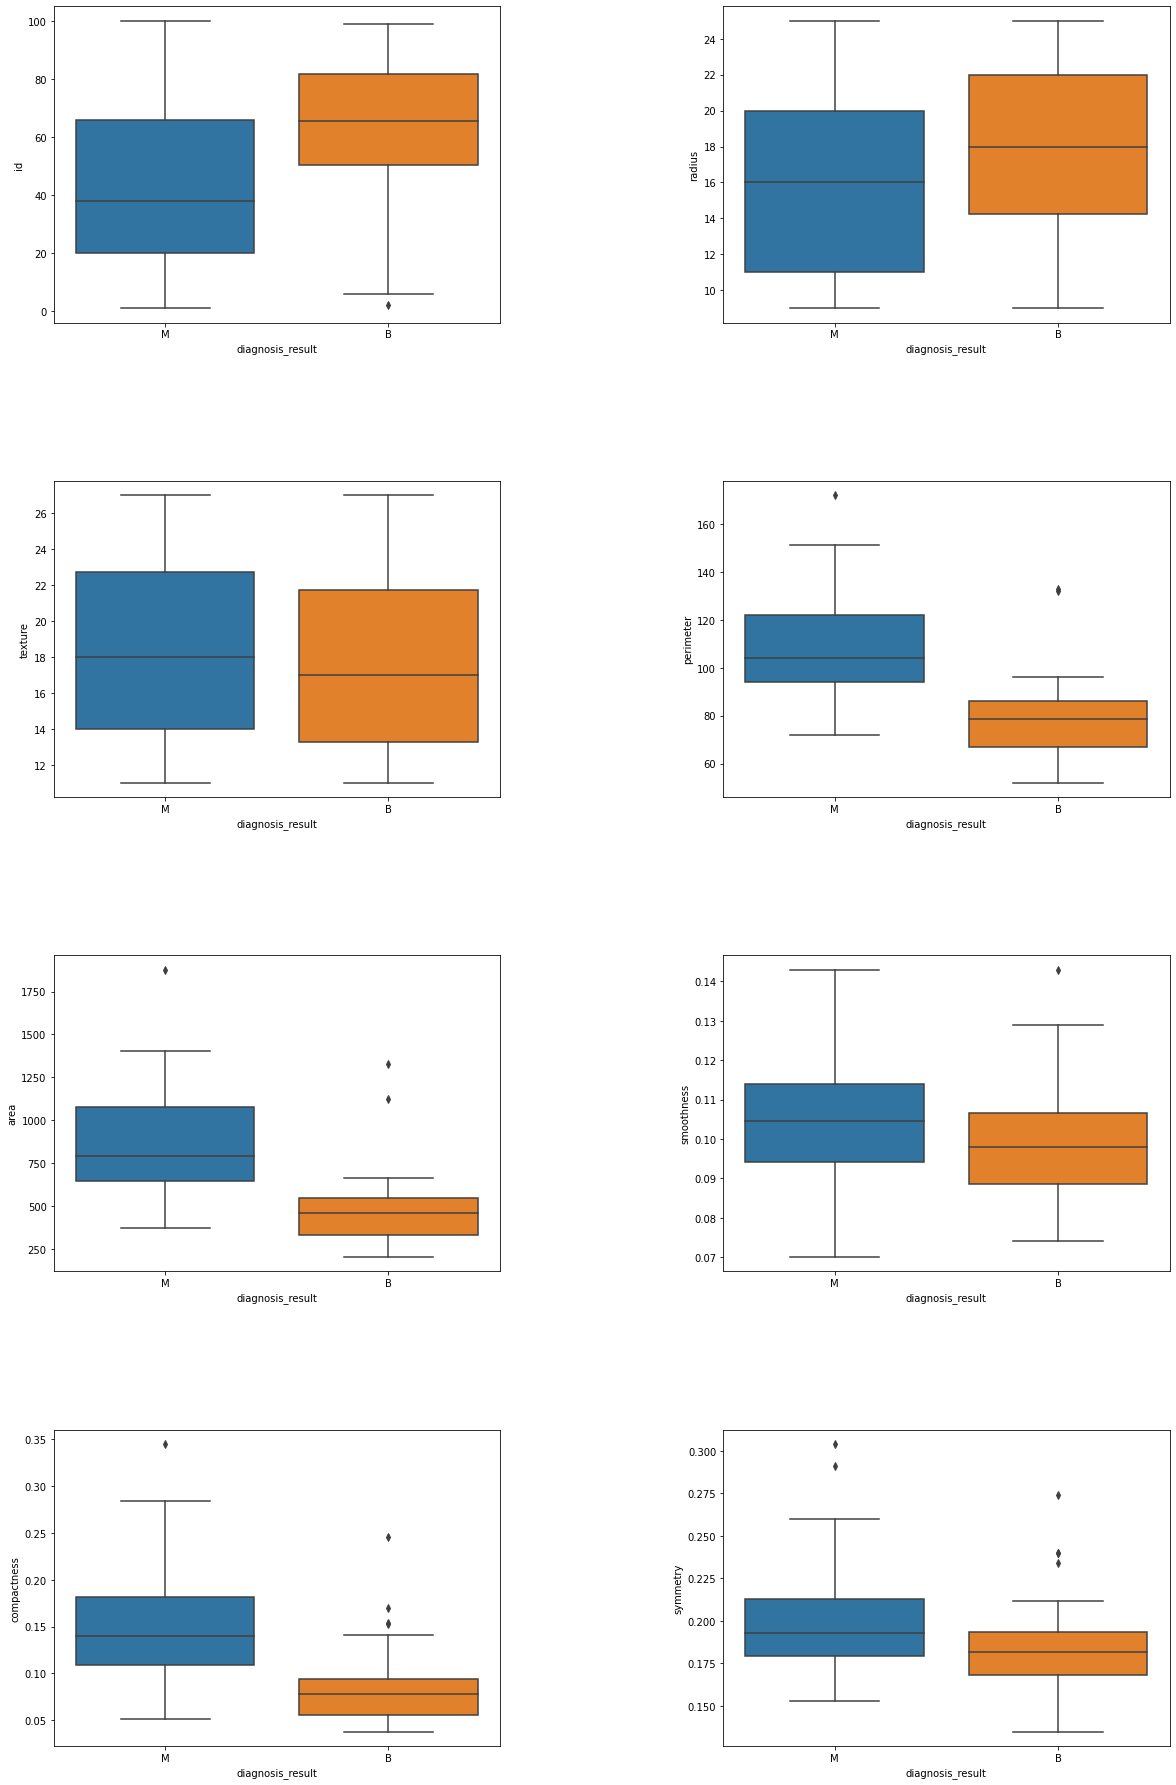

In [21]:
fig,axes = plt.subplots(4,2,figsize=(20,32))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i,ax in zip(num,axes.flatten()):
    sns.boxplot(x = 'diagnosis_result', y = i, data = d,ax=ax)

## Brief multivariate analysis

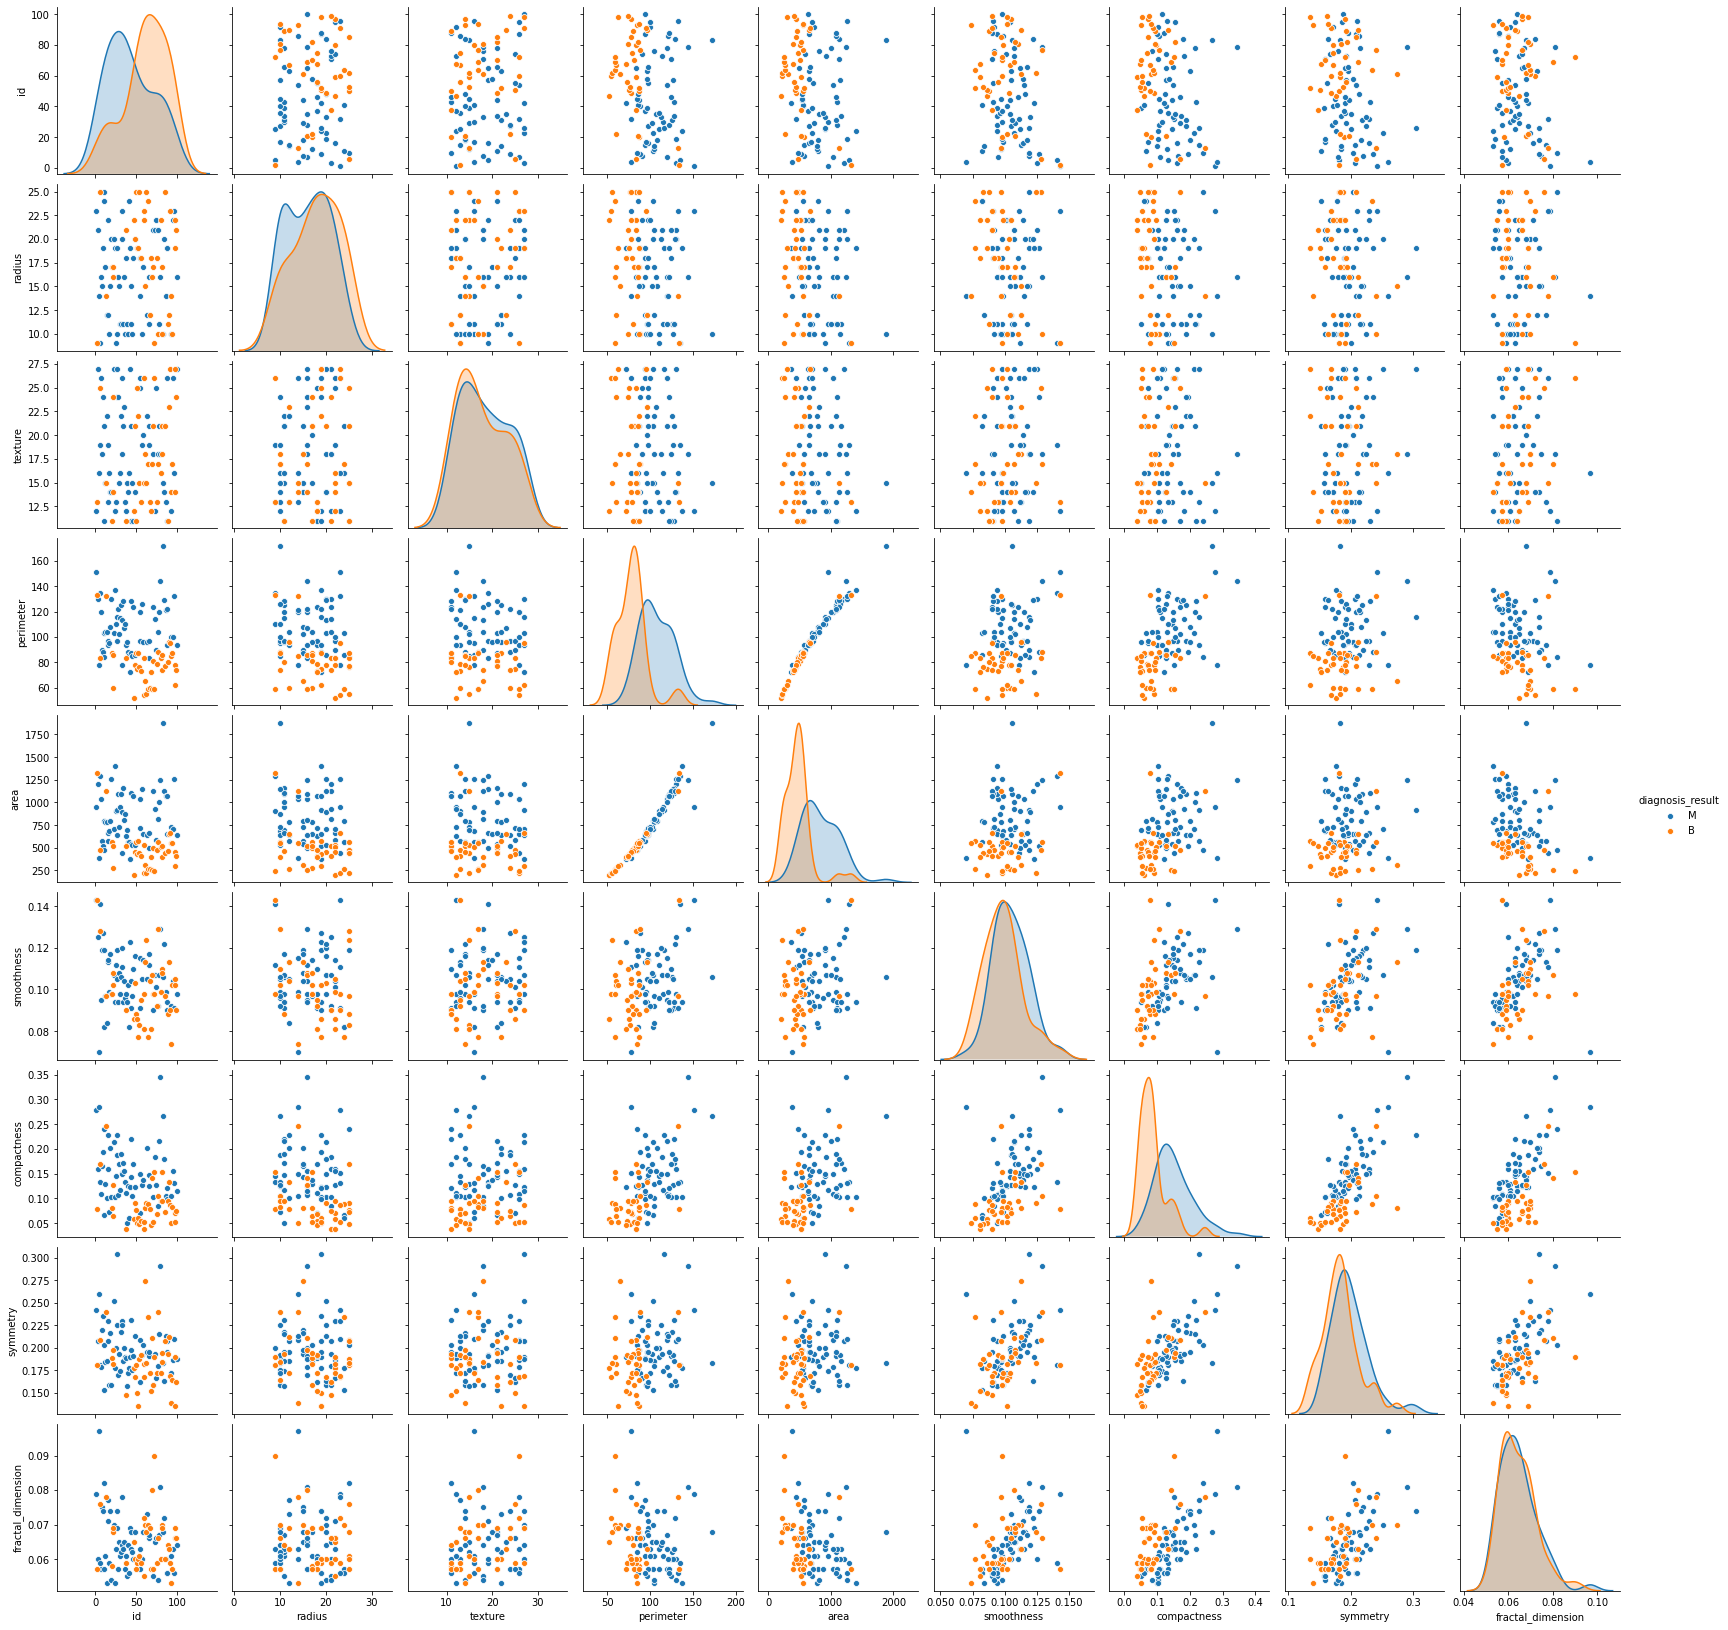

In [22]:
sns.pairplot(d,hue='diagnosis_result')

## Balance in the dataset

In [23]:
d1['diagnosis_result'].value_counts(normalize=True)

1    0.62
2    0.38
Name: diagnosis_result, dtype: float64

## Building a simple Logistic Regression Model

In [24]:
d1 = d.copy()

In [25]:
d1.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [26]:
d1.drop('id', axis = 1, inplace = True)

In [27]:
d1['diagnosis_result'] = d1['diagnosis_result'].apply(lambda x : 1 if x == 'M' else 0)

In [28]:
X = d1.drop('diagnosis_result', axis = 1, inplace = False)
Y = d1.pop('diagnosis_result')

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [30]:
X_train.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension'],
      dtype='object')

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 67 to 37
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             70 non-null     int64  
 1   texture            70 non-null     int64  
 2   perimeter          70 non-null     int64  
 3   area               70 non-null     int64  
 4   smoothness         70 non-null     float64
 5   compactness        70 non-null     float64
 6   symmetry           70 non-null     float64
 7   fractal_dimension  70 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 4.9 KB


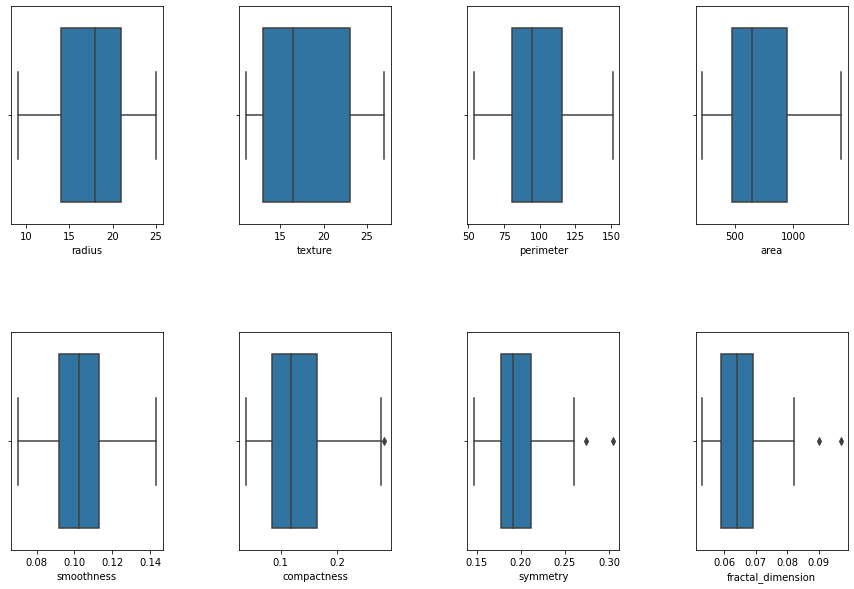

In [32]:
num = list(X_train.dtypes[X_train.dtypes != 'object'].index)
fig,axes = plt.subplots(2,4,figsize=(15,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=X_train,ax=j)

## Treating outliers in training dataset only so that Testing data can be as real as possible

In [33]:
# Treating the Outliers - Winsorization
def remove_outlier(col):
    sorted(col) # Sorting the column
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for i in num:
    ll,ul = remove_outlier(X_train[i])
    X_train[i] = np.where(X_train[i]>ul,X_train[i].quantile(0.95),X_train[i])
    X_train[i] = np.where(X_train[i]<ll,X_train[i].quantile(0.05),X_train[i])    

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


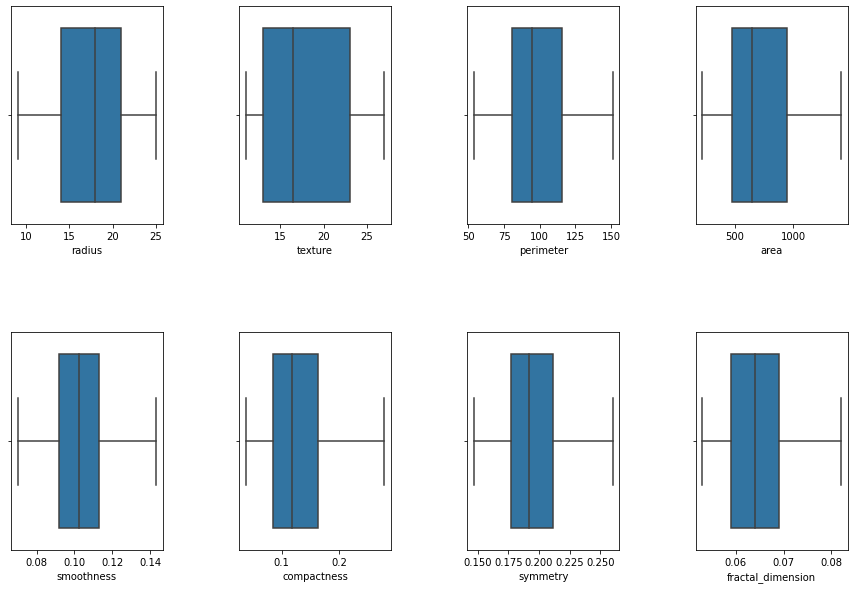

In [34]:
num = list(X_train.dtypes[X_train.dtypes != 'object'].index)
fig,axes = plt.subplots(2,4,figsize=(15,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=X_train,ax=j)

## Importing Statistical package for Logistic Regression
### Building a basic Logistic Regression model with all features. Looking at p-values for their relevance to use only the features that are useful for building a good model.

In [35]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.341502
         Iterations 8


,Coef,Pvalue
radius,-0.016623,0.835021
texture,0.063495,0.400826
perimeter,0.191610,0.131277
area,-0.011353,0.245573
smoothness,-1.374934,0.964940
compactness,45.276337,0.000870
symmetry,-9.985667,0.656228
fractal_dimension,-219.874043,0.051642


## Dropping 'smoothness' first

In [36]:
X_train.drop(['smoothness'], axis = 1, inplace = True)
X_test.drop(['smoothness'], axis = 1, inplace = True)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.341516
         Iterations 8


,Coef,Pvalue
radius,-0.016232,0.837826
texture,0.062902,0.397922
perimeter,0.193075,0.116053
area,-0.011496,0.213362
compactness,45.447976,0.000506
symmetry,-10.113741,0.648878
fractal_dimension,-222.648390,0.018287


## Dropping 'radius'

In [38]:
X_train.drop('radius', axis = 1, inplace = True)
X_test.drop('radius', axis = 1, inplace = True)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.341814
         Iterations 8


,Coef,Pvalue
texture,0.061411,0.407278
perimeter,0.185039,0.111177
area,-0.010895,0.213441
compactness,45.656322,0.000439
symmetry,-9.577228,0.666378
fractal_dimension,-223.032508,0.018303


## Dropping 'symmetry'

In [40]:
X_train.drop('symmetry', axis = 1, inplace = True)
X_test.drop('symmetry', axis = 1, inplace = True)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.343185
         Iterations 8


,Coef,Pvalue
texture,0.064552,0.381424
perimeter,0.169531,0.123819
area,-0.009936,0.240470
compactness,44.642708,0.000435
fractal_dimension,-237.877833,0.007853


## Dropping 'texture'

In [42]:
X_train.drop('texture', axis = 1, inplace = True)
X_test.drop('texture', axis = 1, inplace = True)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.348767
         Iterations 8


,Coef,Pvalue
perimeter,0.193537,0.077833
area,-0.011750,0.161720
compactness,44.420697,0.000533
fractal_dimension,-235.921683,0.009479


## Dropping 'area'

In [44]:
X_train.drop('area', axis = 1, inplace = True)
X_test.drop('area', axis = 1, inplace = True)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
import statsmodels.api as sm
logit_mod = sm.Logit(Y_train,X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.364011
         Iterations 7


,Coef,Pvalue
perimeter,0.047980,0.004008
compactness,36.621945,0.000538
fractal_dimension,-129.072418,0.000047


## Final Summary of the model

In [46]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:       diagnosis_result   No. Observations:                   70
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                  0.4541
Time:                        15:58:46   Log-Likelihood:                -25.481
converged:                       True   LL-Null:                       -46.675
Covariance Type:            nonrobust   LLR p-value:                 6.241e-10
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
perimeter             0.0480      0.017      2.878      0.004       0.015       0.081
compactness          36.6219     10.581      3.461      0.001      15.884      57.360
fractal_dimension  -129.

## Model Performace

In [47]:
ytrain_predict = result.predict(X_train)
ytest_predict = result.predict(X_test)

In [48]:
ytrain_predict_value = ytrain_predict.apply(lambda x : 1 if x > 0.5 else 0)

## Training set performance

In [50]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(Y_train, ytrain_predict_value))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.86      0.88      0.87        43

    accuracy                           0.84        70
   macro avg       0.84      0.83      0.83        70
weighted avg       0.84      0.84      0.84        70



AUC: 0.831


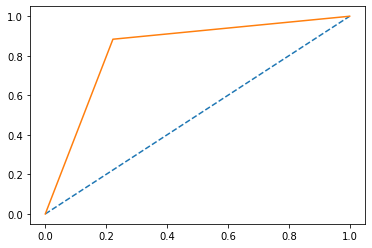

In [51]:
# predict probabilities
probs = ytrain_predict_value
# keep probabilities for the positive outcome only
# /probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## Test set performace

In [52]:
ytest_predict_value = ytest_predict.apply(lambda x : 1 if x > 0.5 else 0)

In [53]:
print(classification_report(Y_test, ytest_predict_value))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.94      0.84      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30



AUC: 0.876


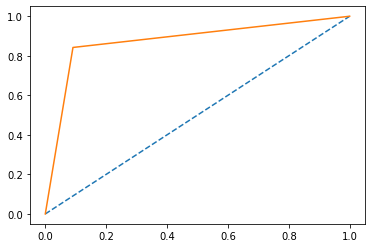

In [54]:
# predict probabilities
probs = ytest_predict_value
# keep probabilities for the positive outcome only
# /probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## The End